<a href="https://colab.research.google.com/github/soumyb09/soumyb09/blob/tensorflow/TF_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [17]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [18]:
# we have 2D data here
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [19]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [21]:
#model building
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [27]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1298 - accuracy: 0.9505 - val_loss: 0.3536 - val_accuracy: 0.9017
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1191 - accuracy: 0.9555 - val_loss: 0.3436 - val_accuracy: 0.9004
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1150 - accuracy: 0.9568 - val_loss: 0.3847 - val_accuracy: 0.8960
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1119 - accuracy: 0.9574 - val_loss: 0.3829 - val_accuracy: 0.8999
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1081 - accuracy: 0.9586 - val_loss: 0.3940 - val_accuracy: 0.8978
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1031 - accuracy: 0.9612 - val_loss: 0.4091 - val_accuracy: 0.9024
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1005 - accuracy: 0.9625 - val_loss: 0.4027 - val_accuracy:

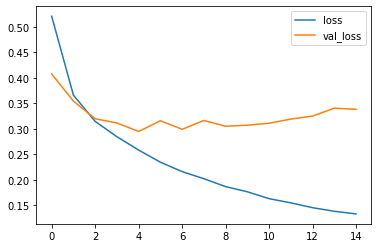

In [23]:
#plotting loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

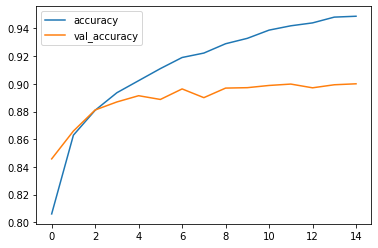

In [24]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [28]:
print(model.evaluate(x_test, y_test)) #evaluating model

313/313 [==============================] - 1s 2ms/step - loss: 0.4847 - accuracy: 0.8964
[0.48472651839256287, 0.896399974822998]


Confusion matrix, without normalization
[[832   0  32  17   2   1 112   0   4   0]
 [  4 974   1  13   1   0   6   0   1   0]
 [ 12   0 881  11  30   0  65   0   1   0]
 [  9   4  25 906  17   0  37   0   2   0]
 [  0   1  98  30 768   0 101   0   2   0]
 [  0   0   0   2   0 967   1  18   2  10]
 [ 98   1  68  19  62   0 742   0   9   1]
 [  0   0   0   1   0   6   0 969   0  24]
 [  3   0   4   2   5   2  13   1 969   1]
 [  0   0   0   0   0   5   1  38   0 956]]


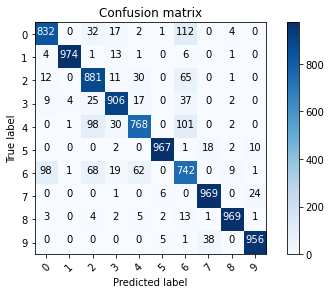

In [29]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [30]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

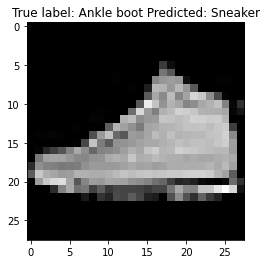

In [31]:
#misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

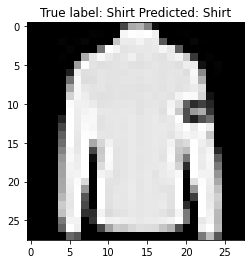

In [34]:
classified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(classified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));